Error fetching price series for BSV
Error fetching price series for CRO
Error fetching price series for XCN


/Users/markszulyovszky/micromamba/envs/lab-backend/lib/python3.12/site-packages/alphalens/utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change(period)
/Users/markszulyovszky/micromamba/envs/lab-backend/lib/python3.12/site-packages/alphalens/utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change(period)
/Users/markszulyovszky/micromamba/envs/lab-backend/lib/python3.12/site-packages/alphalens/utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future versi

Dropped 1.9% entries from factor data: 1.9% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 50.0%, not exceeded: OK!
Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-0.500021,0.041195,-0.023678,0.035949,20962,20.674419
2,-0.257440,0.064845,-0.015425,0.025252,19967,19.693069
3,-0.185147,0.093203,-0.011606,0.021877,19831,19.558935
4,-0.165441,0.149600,-0.006863,0.020627,19965,19.691097
5,-0.137382,2.555618,0.024227,0.093666,20666,20.382480


Returns Analysis


,1D,5D,10D
Ann. alpha,0.050,-0.052,-0.106
beta,-0.029,-0.024,-0.024
Mean Period Wise Return Top Quantile (bps),4.793,1.799,0.809
Mean Period Wise Return Bottom Quantile (bps),-6.728,-7.236,-5.574
Mean Period Wise Spread (bps),11.521,8.939,6.465


<Figure size 640x480 with 0 Axes>

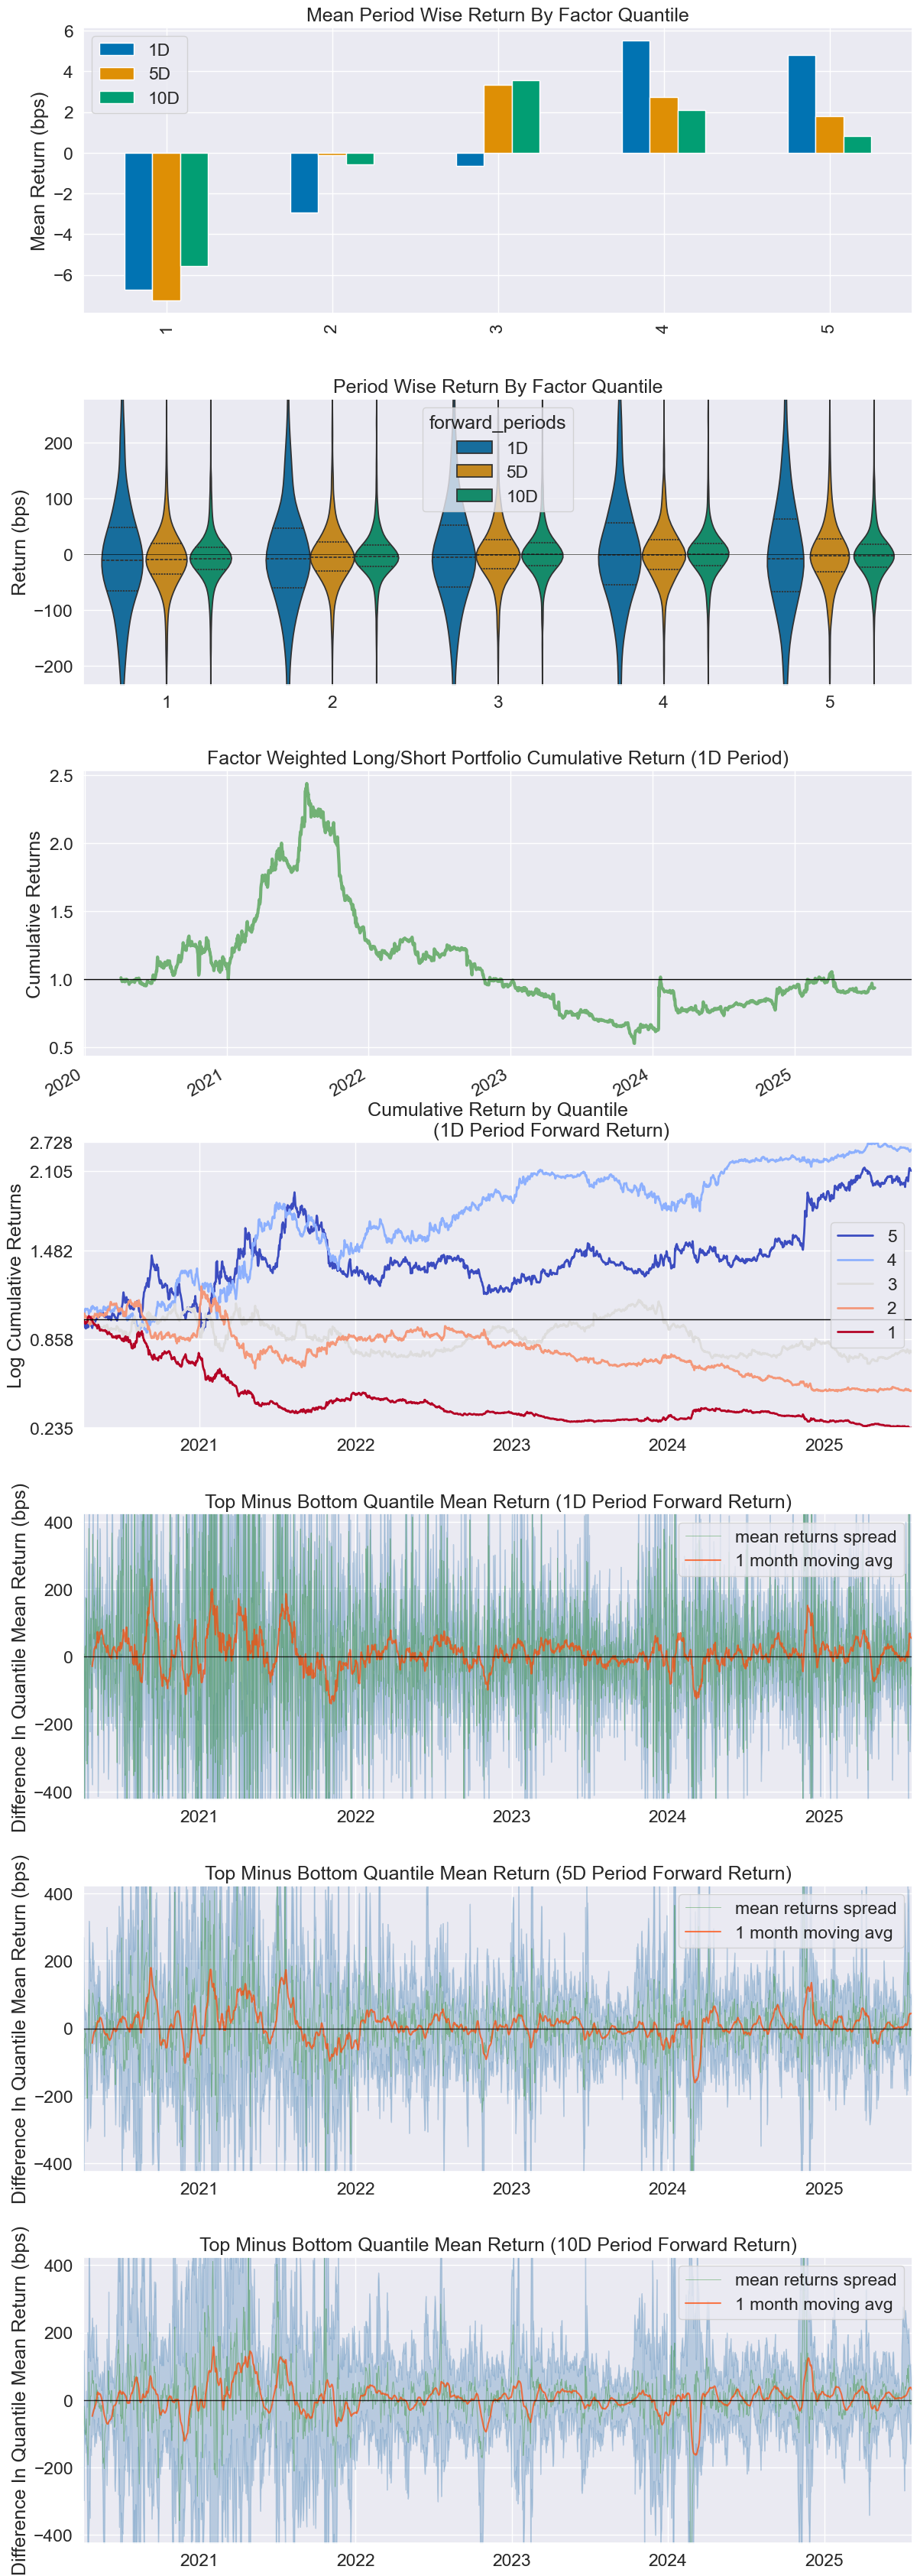

Information Analysis


,1D,5D,10D
IC Mean,0.013,0.020,0.018
IC Std.,0.170,0.167,0.167
Risk-Adjusted IC,0.075,0.117,0.111
t-stat(IC),3.291,5.141,4.875
p-value(IC),0.001,0.000,0.000
IC Skew,0.043,0.009,-0.128
IC Kurtosis,0.244,0.376,0.437


/Users/markszulyovszky/micromamba/envs/lab-backend/lib/python3.12/site-packages/alphalens/performance.py:118: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouper.append(pd.Grouper(freq=by_time))


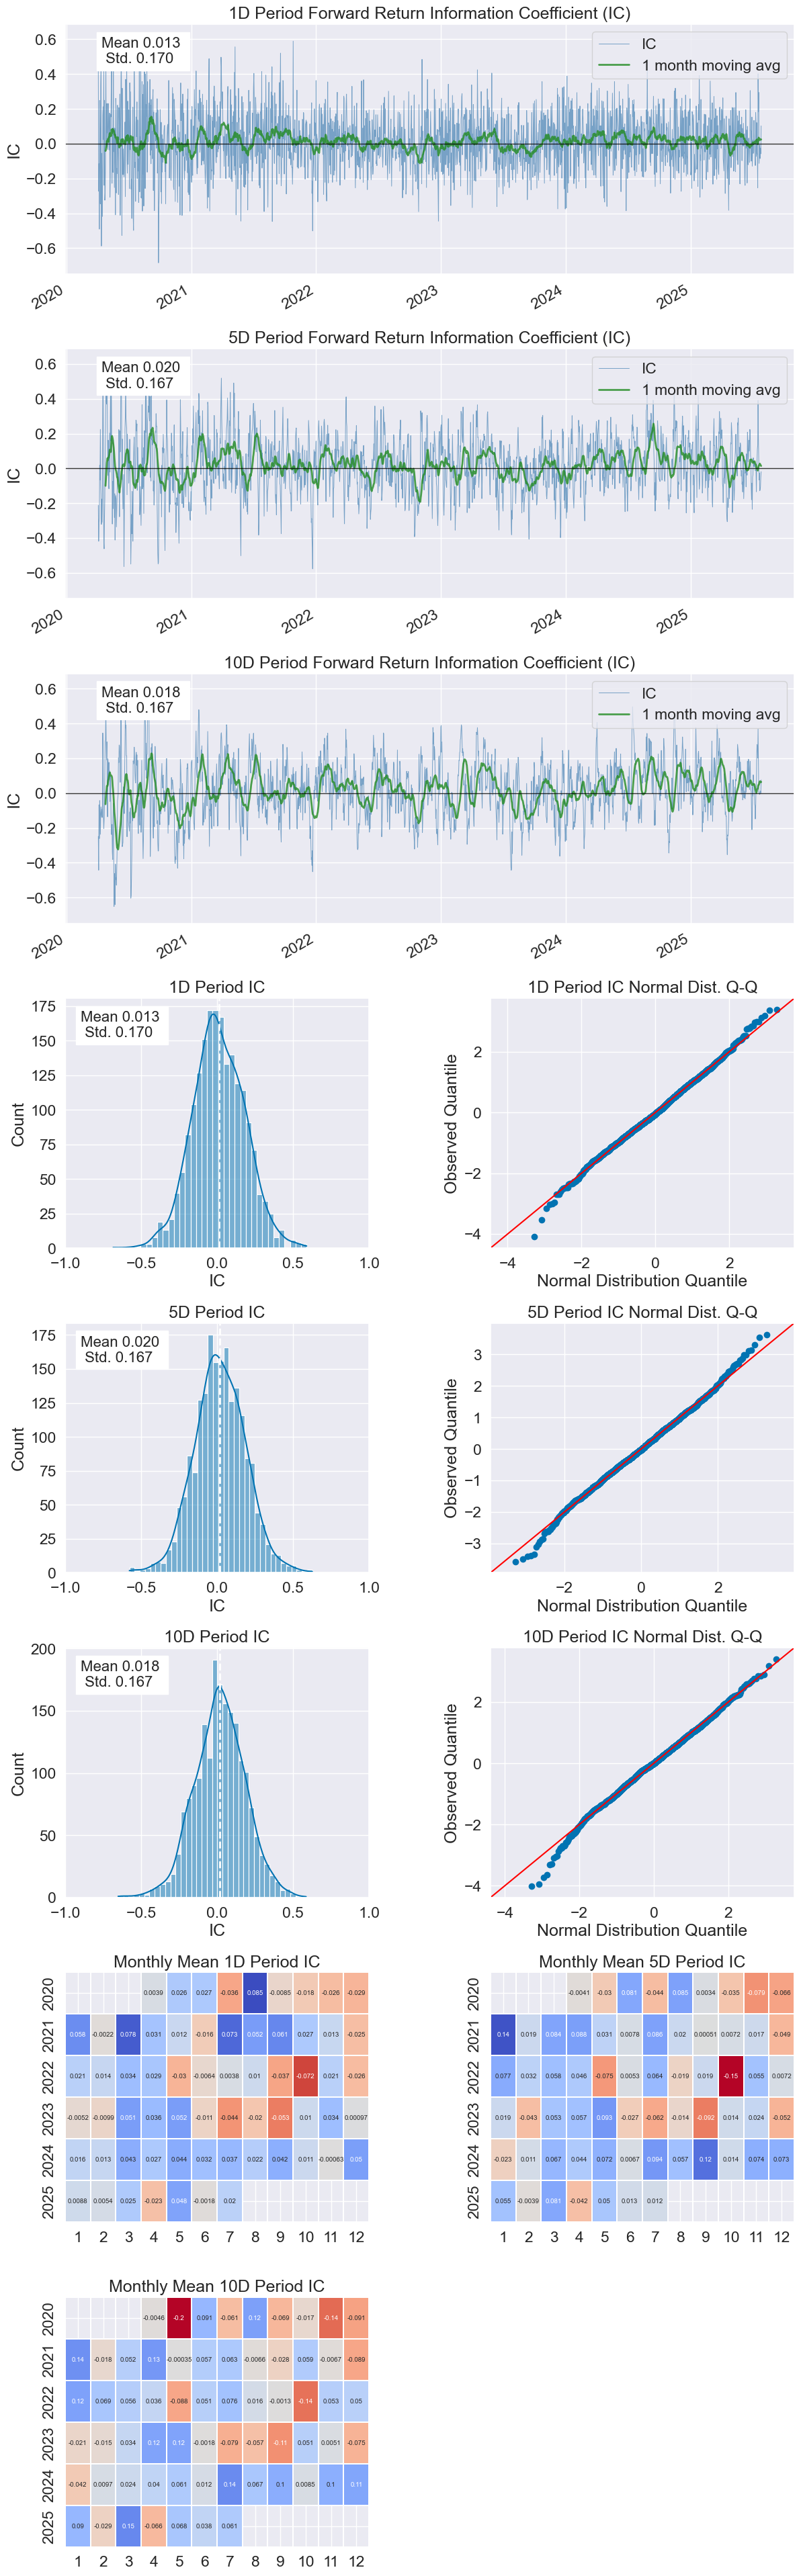

/Users/markszulyovszky/micromamba/envs/lab-backend/lib/python3.12/site-packages/alphalens/utils.py:928: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


,1D,5D,10D
Quantile 1 Mean Turnover,0.213,0.530,0.594
Quantile 2 Mean Turnover,0.423,0.707,0.731
Quantile 3 Mean Turnover,0.442,0.720,0.749
Quantile 4 Mean Turnover,0.363,0.682,0.723
Quantile 5 Mean Turnover,0.152,0.406,0.473


,1D,5D,10D
Mean Factor Rank Autocorrelation,0.914,0.569,0.468


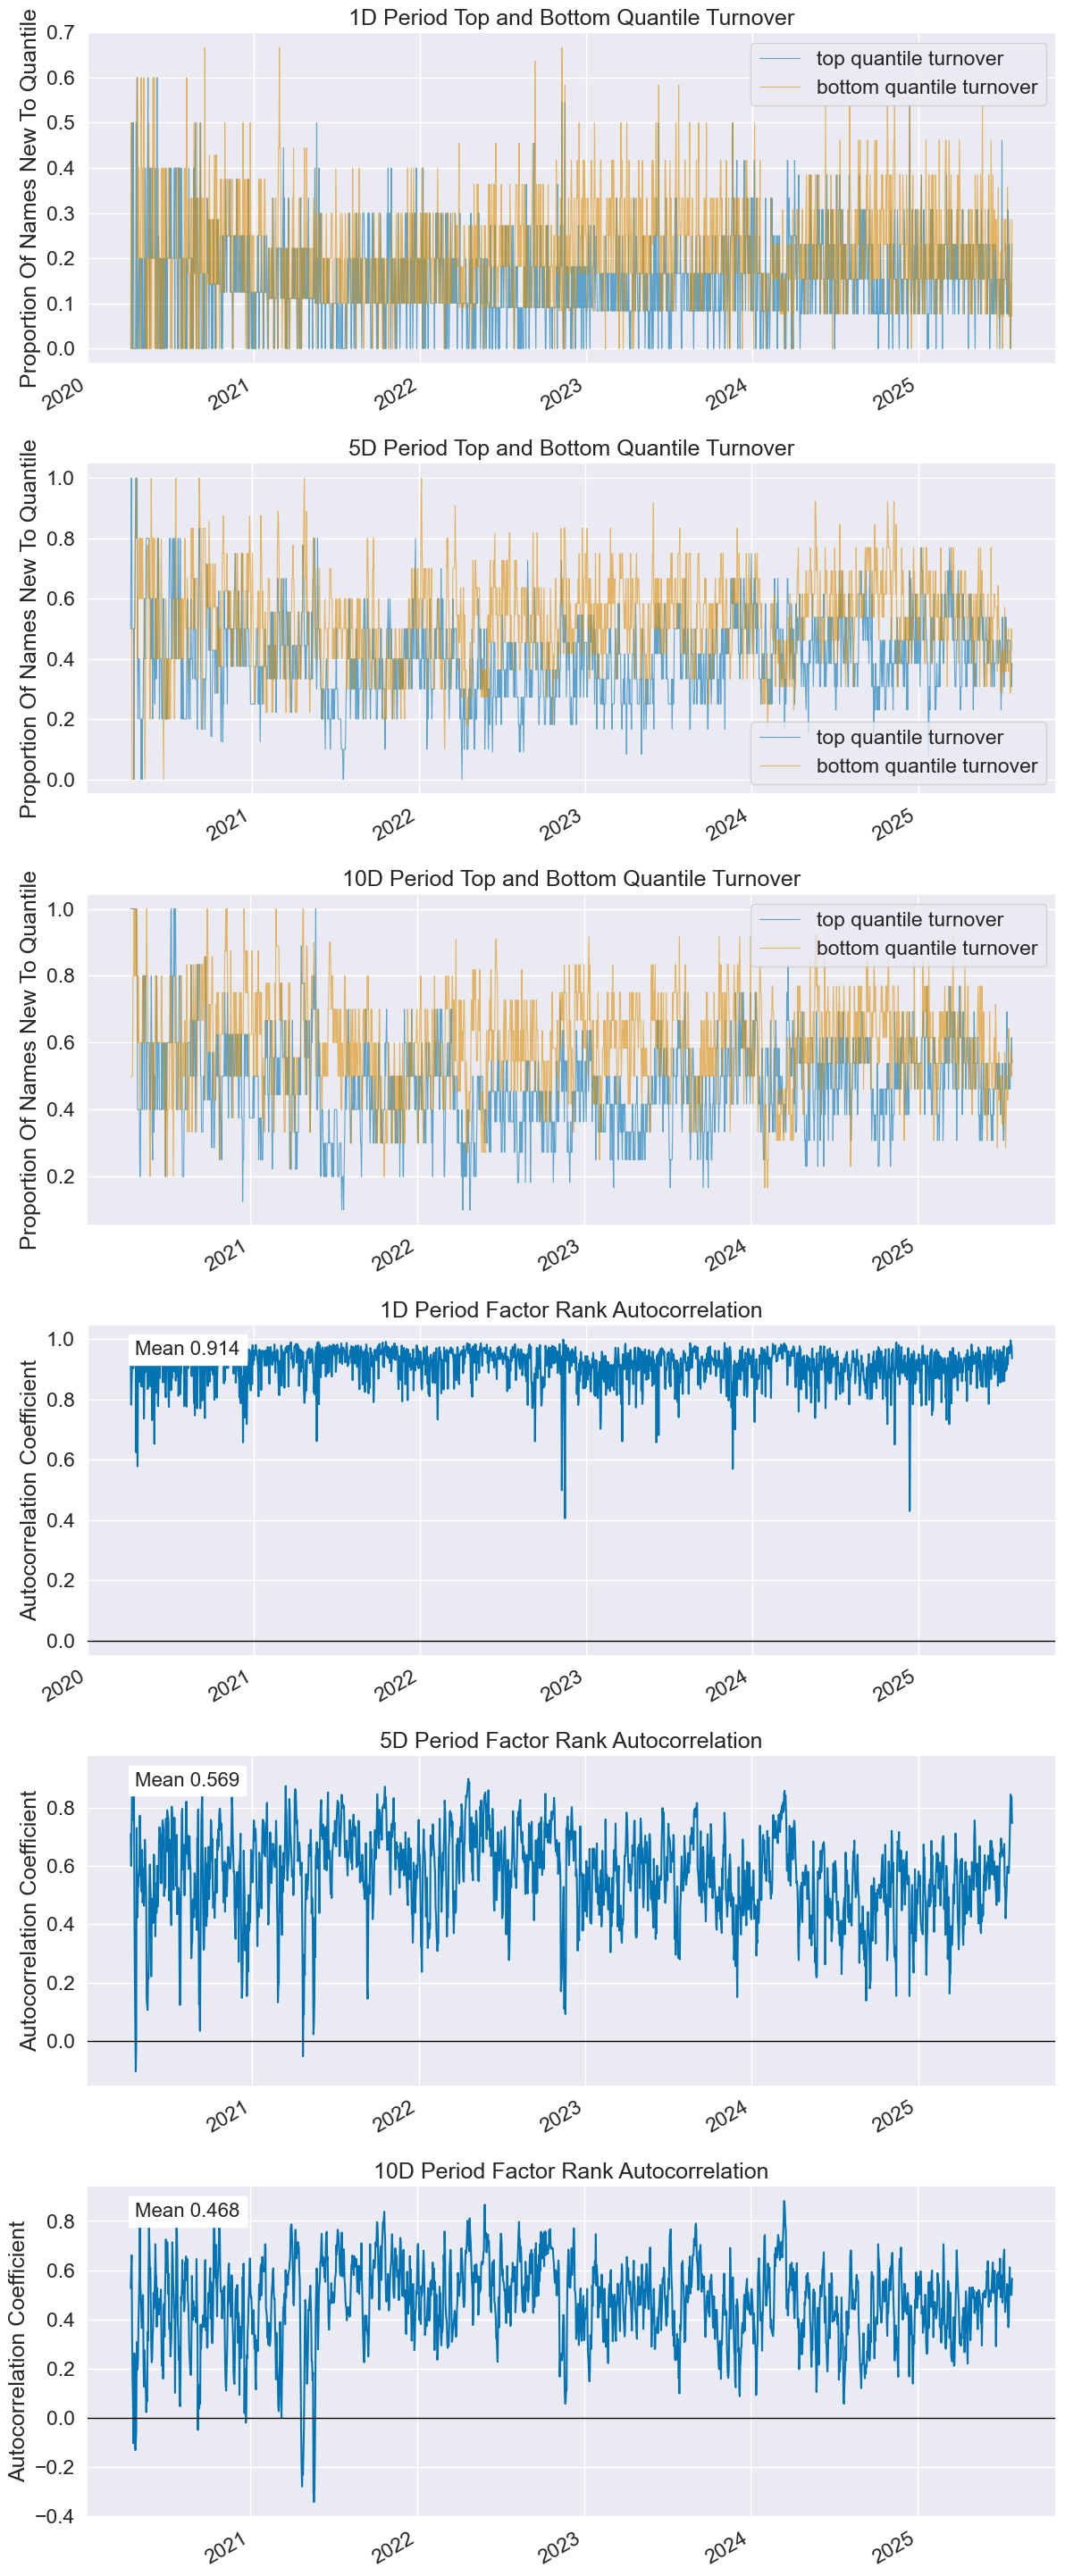

In [ ]:

from typing import Any


from analysis.utils import get_env

from analysis.alphalens import factor_analysis
from analysis.price import get_price_data
from api.portfolio.factors import get_portfolio_factors_historical
from api.portfolio.tickers import get_tickers

UNRAVEL_API_KEY = get_env("UNRAVEL_API_KEY")
portfolio = "carry_enhanced"

available_tickers = get_tickers(portfolio, UNRAVEL_API_KEY, universe_size="30")
historical_factors = get_portfolio_factors_historical(
    portfolio, available_tickers, UNRAVEL_API_KEY
)

underlying = get_price_data(available_tickers)

columns_intersection = historical_factors.columns.intersection(underlying.columns)
factor_analysis(historical_factors[columns_intersection], underlying)